In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import time

The video was originally split into frames in this variant using [EzGif](https://ezgif.com/video-to-jpg)

# How much should the image be processed before classifying

## Only grayscaled and reshaped into a 1D array

In [2]:
positiveImages=[]
files=os.listdir("positive")
for i in range(1,len(files)+1):
    img=cv2.imread("positive//1({}).jpg".format(i))
    original=img.shape
    grayscale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    reshaped=grayscale.reshape(-1)
    positiveImages.append(reshaped)

In [3]:
negativeImages=[]
files=os.listdir("negative")
for i in range(1,len(files)+1):
    img=cv2.imread("negative//1({}).jpg".format(i))
    grayscale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    reshaped=grayscale.reshape(-1)
    negativeImages.append(reshaped)

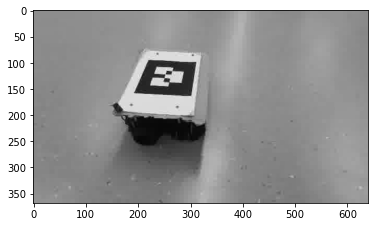

In [4]:
plt.imshow(positiveImages[0].reshape(original[0],original[1]),cmap="gray")

In [5]:
# positive=pd.DataFrame(positiveImages)
# positive["y"]=1
# negative=pd.DataFrame(negativeImages)
# negative["y"]=0
# resulting=pd.concat([positive,negative])
# X_train, X_test, y_train, y_test = train_test_split(resulting.drop("y",axis=1),resulting.y,test_size=0.3,random_state=0)

**This does not work well enough, since there are too many data points and running this code takes too long, so a possibility is to resize the image and make it smaller.** 

**Here it is possible too see how well different sized images classify and how long it takes.**

## Grayscale image that is resized and reshaped. The sizes, that I will test are 10 to 150 by the increment of 10.

**This time let's read in the images into arrays, so it will be easier to work with them.**

In [6]:
positives=[]
files=os.listdir("positive")
for i in range(1,len(files)+1):
    img=cv2.imread("positive//1({}).jpg".format(i))
    grayscale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    positives.append(grayscale)
negatives=[]
files=os.listdir("negative")
for i in range(1,len(files)+1):
    img=cv2.imread("negative//1({}).jpg".format(i))
    grayscale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    negatives.append(grayscale)

In [7]:
for i in range(1,16):
    start=time.time()
    allPositive=[]
    allNegative=[]
    for j in positives:
        resized=cv2.resize(j,(i*10,i*10))
        reshaped=resized.reshape(-1)
        allPositive.append(reshaped)
    for j in negatives:
        resized=cv2.resize(j,(i*10,i*10))
        reshaped=resized.reshape(-1)
        allNegative.append(reshaped)
    positive=pd.DataFrame(allPositive)
    positive["y"]=1
    negative=pd.DataFrame(allNegative)
    negative["y"]=0
    resulting=pd.concat([positive,negative])
    X_train, X_test, y_train, y_test = train_test_split(resulting.drop("y",axis=1),resulting.y,test_size=0.3,random_state=0)
    KNN = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
    rf = RandomForestClassifier().fit(X_train,y_train)
    predicted=rf.predict(X_test)
    prediction=KNN.predict(X_test)
    modelAcc=accuracy_score(prediction,y_test)
    modelAcc2=accuracy_score(predicted,y_test)
    end=time.time()
    print("Grayscale Image sized:",str(i*10)+"X"+str(i*10),"took:", round(end-start,3),"s and had an accuracy of:",modelAcc,"with KNN and", modelAcc2,"with Random Forest")

Grayscale Image sized: 10X10 took: 0.204 s and had an accuracy of: 0.8875 with KNN and 1.0 with Random Forest
Grayscale Image sized: 20X20 took: 0.314 s and had an accuracy of: 0.85 with KNN and 1.0 with Random Forest
Grayscale Image sized: 30X30 took: 0.437 s and had an accuracy of: 0.85 with KNN and 0.9875 with Random Forest
Grayscale Image sized: 40X40 took: 0.691 s and had an accuracy of: 0.85 with KNN and 1.0 with Random Forest
Grayscale Image sized: 50X50 took: 1.096 s and had an accuracy of: 0.85 with KNN and 1.0 with Random Forest
Grayscale Image sized: 60X60 took: 1.361 s and had an accuracy of: 0.8375 with KNN and 0.975 with Random Forest
Grayscale Image sized: 70X70 took: 1.912 s and had an accuracy of: 0.8375 with KNN and 0.9875 with Random Forest
Grayscale Image sized: 80X80 took: 2.356 s and had an accuracy of: 0.85 with KNN and 1.0 with Random Forest
Grayscale Image sized: 90X90 took: 2.949 s and had an accuracy of: 0.8375 with KNN and 1.0 with Random Forest
Grayscale Im

**From this data it seems that the $10\times 10$ Image is the most accurate and had an accuracy of 0.8875 with K-Nearest Neighbors and took the least amount of time to work, but is it possible to make it work even more accurately.**

## One image processing method, that can be used to maybe get better accuracy is to binarize the image and see how this changes accuracy.

In [8]:
for i in range(1,16):
    start=time.time()
    allPositive=[]
    allNegative=[]
    for j in positives:
        ret,threshold = cv2.threshold(j,100,255,cv2.THRESH_BINARY)
        resized=cv2.resize(threshold,(i*10,i*10))
        reshaped=resized.reshape(-1)
        allPositive.append(reshaped)
    for j in negatives:
        ret,threshold = cv2.threshold(j,100,255,cv2.THRESH_BINARY)
        resized=cv2.resize(threshold,(i*10,i*10))
        reshaped=resized.reshape(-1)
        allNegative.append(reshaped)
    positive=pd.DataFrame(allPositive)
    positive["y"]=1
    negative=pd.DataFrame(allNegative)
    negative["y"]=0
    resulting=pd.concat([positive,negative])
    X_train, X_test, y_train, y_test = train_test_split(resulting.drop("y",axis=1),resulting.y,test_size=0.3,random_state=0)
    KNN = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
    rf = RandomForestClassifier().fit(X_train,y_train)
    predicted=rf.predict(X_test)
    prediction=KNN.predict(X_test)
    modelAcc=accuracy_score(prediction,y_test)
    modelAcc2=accuracy_score(predicted,y_test)
    end=time.time()
    print("Binary Image sized:",str(i*10)+"X"+str(i*10),"took:", round(end-start,3),"s and had an accuracy of:",modelAcc,"with KNN and", modelAcc2,"with Random Forest")

Binary Image sized: 10X10 took: 0.259 s and had an accuracy of: 0.9375 with KNN and 0.975 with Random Forest
Binary Image sized: 20X20 took: 0.259 s and had an accuracy of: 0.9125 with KNN and 1.0 with Random Forest
Binary Image sized: 30X30 took: 0.487 s and had an accuracy of: 0.9125 with KNN and 1.0 with Random Forest
Binary Image sized: 40X40 took: 0.62 s and had an accuracy of: 0.9375 with KNN and 0.9875 with Random Forest
Binary Image sized: 50X50 took: 0.946 s and had an accuracy of: 0.9375 with KNN and 0.975 with Random Forest
Binary Image sized: 60X60 took: 1.336 s and had an accuracy of: 0.95 with KNN and 0.975 with Random Forest
Binary Image sized: 70X70 took: 1.646 s and had an accuracy of: 0.9375 with KNN and 1.0 with Random Forest
Binary Image sized: 80X80 took: 1.972 s and had an accuracy of: 0.9375 with KNN and 0.9875 with Random Forest
Binary Image sized: 90X90 took: 2.434 s and had an accuracy of: 0.925 with KNN and 0.9875 with Random Forest
Binary Image sized: 100X10

**With this the highest accuracy is with $60\times 60$, but this could be too slow, so maybe the ones with a bit less accuracy, but run faster could be better fit.**

In [9]:
for i in range(1,16):
    start=time.time()
    allPositive=[]
    allNegative=[]
    for j in positives:
        Gaussianed=cv2.GaussianBlur(j,(7,7),1)
        ret,threshold = cv2.threshold(Gaussianed,100,255,cv2.THRESH_BINARY)
        resized=cv2.resize(threshold,(i*10,i*10))
        reshaped=resized.reshape(-1)
        allPositive.append(reshaped)
    for j in negatives:
        Gaussianed=cv2.GaussianBlur(j,(7,7),1)
        ret,threshold = cv2.threshold(Gaussianed,100,255,cv2.THRESH_BINARY)
        resized=cv2.resize(threshold,(i*10,i*10))
        reshaped=resized.reshape(-1)
        allNegative.append(reshaped)
    positive=pd.DataFrame(allPositive)
    positive["y"]=1
    negative=pd.DataFrame(allNegative)
    negative["y"]=0
    resulting=pd.concat([positive,negative])
    X_train, X_test, y_train, y_test = train_test_split(resulting.drop("y",axis=1),resulting.y,test_size=0.3,random_state=0)
    KNN = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
    rf = RandomForestClassifier().fit(X_train,y_train)
    predicted=rf.predict(X_test)
    prediction=KNN.predict(X_test)
    modelAcc=accuracy_score(prediction,y_test)
    modelAcc2=accuracy_score(predicted,y_test)
    end=time.time()
    print("Gaussian Blurred Binary Image sized:",str(i*10)+"X"+str(i*10),"took:", round(end-start,3),"s and had an accuracy of:",modelAcc,"with KNN and", modelAcc2,"with Random Forest")

Gaussian Blurred Binary Image sized: 10X10 took: 0.284 s and had an accuracy of: 0.9375 with KNN and 0.975 with Random Forest
Gaussian Blurred Binary Image sized: 20X20 took: 0.319 s and had an accuracy of: 0.8875 with KNN and 1.0 with Random Forest
Gaussian Blurred Binary Image sized: 30X30 took: 0.45 s and had an accuracy of: 0.9125 with KNN and 1.0 with Random Forest
Gaussian Blurred Binary Image sized: 40X40 took: 0.637 s and had an accuracy of: 0.925 with KNN and 0.9875 with Random Forest
Gaussian Blurred Binary Image sized: 50X50 took: 0.941 s and had an accuracy of: 0.925 with KNN and 1.0 with Random Forest
Gaussian Blurred Binary Image sized: 60X60 took: 1.21 s and had an accuracy of: 0.95 with KNN and 0.9875 with Random Forest
Gaussian Blurred Binary Image sized: 70X70 took: 1.533 s and had an accuracy of: 0.9375 with KNN and 0.975 with Random Forest
Gaussian Blurred Binary Image sized: 80X80 took: 2.03 s and had an accuracy of: 0.9375 with KNN and 0.9875 with Random Forest
Ga

**To try and lessen the amount of noise in the image, it is possible to use Gaussian blur.**

## Next up, I will be testing, how only edges change the accuracy  of the models.

**On this occasion edges will be detected using Canny edge detection and the detected edges will be dilated, to make them simpler to spot.**

In [10]:
def Edges(image):
    canned = cv2.Canny(image,50,255)
    kernel=np.ones((5,5))
    dilated=cv2.dilate(canned,kernel,iterations=1)
    return dilated

In [11]:
for i in range(1,16):
    start=time.time()
    allPositive=[]
    allNegative=[]
    for j in positives:
        Edgy=Edges(j)
        resized=cv2.resize(threshold,(i*10,i*10))
        reshaped=resized.reshape(-1)
        allPositive.append(reshaped)
    for j in negatives:
        Edgy=Edges(j)
        resized=cv2.resize(threshold,(i*10,i*10))
        reshaped=resized.reshape(-1)
        allNegative.append(reshaped)
    positive=pd.DataFrame(allPositive)
    positive["y"]=1
    negative=pd.DataFrame(allNegative)
    negative["y"]=0
    resulting=pd.concat([positive,negative])
    X_train, X_test, y_train, y_test = train_test_split(resulting.drop("y",axis=1),resulting.y,test_size=0.3,random_state=0)
    KNN = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
    rf = RandomForestClassifier().fit(X_train,y_train)
    predicted=rf.predict(X_test)
    prediction=KNN.predict(X_test)
    modelAcc=accuracy_score(prediction,y_test)
    modelAcc2=accuracy_score(predicted,y_test)
    end=time.time()
    print("Edge detection:",str(i*10)+"X"+str(i*10),"took:", round(end-start,3),"s and had an accuracy of:",modelAcc,"with KNN and", modelAcc2,"with Random Forest")

Edge detection: 10X10 took: 0.36 s and had an accuracy of: 0.5 with KNN and 0.5 with Random Forest
Edge detection: 20X20 took: 0.418 s and had an accuracy of: 0.5 with KNN and 0.5 with Random Forest
Edge detection: 30X30 took: 0.679 s and had an accuracy of: 0.5 with KNN and 0.5 with Random Forest
Edge detection: 40X40 took: 0.784 s and had an accuracy of: 0.5 with KNN and 0.5 with Random Forest
Edge detection: 50X50 took: 1.081 s and had an accuracy of: 0.5 with KNN and 0.5 with Random Forest
Edge detection: 60X60 took: 1.364 s and had an accuracy of: 0.5 with KNN and 0.5 with Random Forest
Edge detection: 70X70 took: 1.807 s and had an accuracy of: 0.5 with KNN and 0.5 with Random Forest
Edge detection: 80X80 took: 2.461 s and had an accuracy of: 0.5 with KNN and 0.5 with Random Forest
Edge detection: 90X90 took: 2.858 s and had an accuracy of: 0.5 with KNN and 0.5 with Random Forest
Edge detection: 100X100 took: 3.609 s and had an accuracy of: 0.5 with KNN and 0.5 with Random Forest

**With the edges used the accuracy is just random guessing, this may be because only the lines are left and after shrinking the image the size of the edge becomes even smaller. One possibility is to try making the lines thicker and see if that does make a difference.**

In [12]:
def Edges2(image,n):
    canned = cv2.Canny(image,50,255)
    kernel=np.ones((n,n))
    dilated=cv2.dilate(canned,kernel,iterations=1)
    return dilated

In [13]:
for x in range(1,30):
    for i in range(1,10):
        start=time.time()
        allPositive=[]
        allNegative=[]
        for j in positives:
            Edgy=Edges2(j,x)
            resized=cv2.resize(threshold,(i*10,i*10))
            reshaped=resized.reshape(-1)
            allPositive.append(reshaped)
        for j in negatives:
            Edgy=Edges2(j,x)
            resized=cv2.resize(threshold,(i*10,i*10))
            reshaped=resized.reshape(-1)
            allNegative.append(reshaped)
        positive=pd.DataFrame(allPositive)
        positive["y"]=1
        negative=pd.DataFrame(allNegative)
        negative["y"]=0
        resulting=pd.concat([positive,negative])
        X_train, X_test, y_train, y_test = train_test_split(resulting.drop("y",axis=1),resulting.y,test_size=0.3,random_state=0)
        KNN = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
        rf = RandomForestClassifier().fit(X_train,y_train)
        predicted=rf.predict(X_test)
        prediction=KNN.predict(X_test)
        modelAcc=accuracy_score(prediction,y_test)
        modelAcc2=accuracy_score(predicted,y_test)
        end=time.time()
        if modelAcc!=0.5:
            print("Amount of dilation:",x)
            print("Edge detection:",str(i*10)+"X"+str(i*10),"took:", round(end-start,3),"s and had an accuracy of:",modelAcc,"with KNN and", modelAcc2,"with Random Forest")

From this it is possible to say, that dilation and edge detection does not aid in getting better classifiers